In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

# Как работает АС
Armor Class или просто АС расчитывается по следующей формуле:

$$ 
\begin{aligned}
\textrm{Armor Class} & = 10 + \textrm{Dexterity Modifier}_{\textrm{up to armor’s Dex Cap}} + \\
            & + \textrm{Armor's AC Bonus} + \textrm{other bonuses} + \textrm{penalties}
\end{aligned}
$$



In [2]:
lvls = np.arange(1, 11)
trained = 2 + lvls
expert = 4 + lvls
rune = np.array([0, 0, 0, 1, 1, 1, 1, 1 ,1 ,2])
rune

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 2])

In [3]:
np.concatenate((trained[:6], expert[6:]), axis = None)

array([ 3,  4,  5,  6,  7,  8, 11, 12, 13, 14])

In [4]:
min_ac = 10 + trained + rune
max_mid_ac = 10 + 5 + trained + rune
max_heavy_ac = 10 + 6 + trained + rune

max_champ_ac = 10 + 6 + np.concatenate((trained[:6], expert[6:]), axis = None) + rune
max_fighter_ac = 10 + 6 + np.concatenate((trained[:8], expert[8:]), axis = None) + rune
max_champ_shild_ac = max_champ_ac + 2
max_monk_ac = 10 + 4 + expert
max_monk_ac

array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

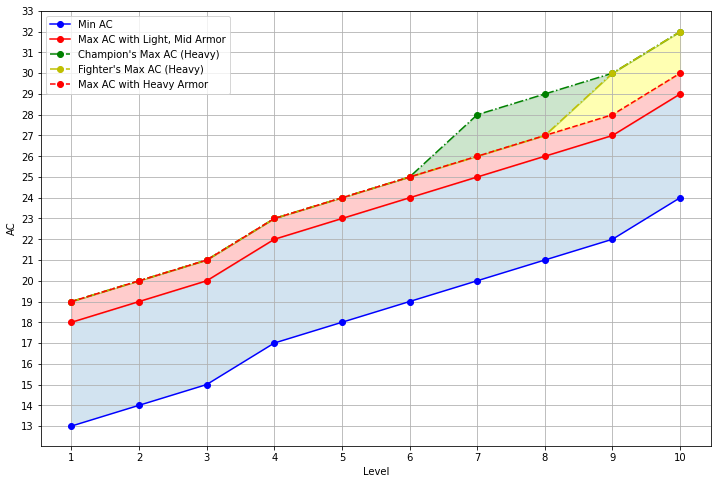

In [5]:

plt.plot(lvls, min_ac, 'bo-', label = "Min AC")
#plt.plot(lvls, max_monk_ac, 'k--o', label = "Max Monk AC")
plt.fill_between(lvls, min_ac, max_mid_ac, alpha = .2)
plt.plot(lvls, max_mid_ac, 'ro-', label = "Max AC with Light, Mid Armor")
plt.fill_between(lvls, max_mid_ac, max_heavy_ac, alpha = .2, color = "red")
plt.fill_between(lvls, max_heavy_ac, max_fighter_ac, alpha = .3, color = "yellow")
plt.plot(lvls, max_champ_ac, 'go-.', label = "Champion's Max AC (Heavy)")
plt.fill_between(lvls, max_fighter_ac, max_champ_ac, alpha = .2, color = "green")
# plt.plot(lvls, max_champ_shild_ac, 'g:', linewidth = 3, label = "Champion's Max AC (Heavy+Shield)")
plt.plot(lvls, max_fighter_ac, 'yo-.' , label = "Fighter's Max AC (Heavy)")
plt.plot(lvls, max_heavy_ac, 'ro--', label = "Max AC with Heavy Armor")


plt.xticks(lvls)
plt.yticks(np.arange(13, 34))
plt.grid(True)
plt.xlabel("Level")
plt.ylabel("AC")

plt.legend()

# Общее

### Min AC: АС персонажей без брони и без бонуса DEX. 

Это актуально для Sourcerer, Wizard и Cleric (с Cloistered Cleric доктриной) которые тренированны только в защите без брони. (Можно добиться даже меньшего АС, например, Wizard c DEX -1 с легкой кожаной броней с AC bonus +1, из-за чего 
теряется proficency bonus. Суммарное АС такого персонажа будет 10 и не будет увеличиваться с уровнем, но это уже self sobatage)

---

### Max AC with Light, Mid Armor: Максимальное АС персонажа в легкой или средней броне. 

Его могут добиться все персонажи тренированные в легкой или средней броне (но насколько это будет практично зависит от случая к случаю). Легкая броня дает маленький бонус к AC, но в то же время имеет больший DEX Cap (позволяет взять больший бонус от ловкости). Средняя (как и Тяжелая) наоборот. В любом случае, бонус АС от легкой и тяжелой брони не превышает 5 (AC Bonus + DEX cap =< 5). 

---

### Max AC with Heavy Armor: Максимальное AC персонажа в тяжелой броне.

К тяжелой броне изначально имеют доступ Champion и Fighter. Она имеет меньший DEX Cap и большое требование к STR. Тем не менее максимальный бонус к АС от тяжелой брони 6 (AC Bonus + DEX cap = 6), но минус в том что даже при соблюдении требований к STR тяжелая броня уменьшает скорость персонажа на 5 feet. 

# Особые случаи
* **Champion**: Получает Expert proficency в броне на 7-ом уровне, что добавляет, по сравнению с Trained proficency, +2 к АС

* **Fighter**: Получает Expert proficency в броне на 9-ом уровне, что добавляет, по сравнению с Trained proficency, +2 к АС

* **Monk**: Изначально является экспертом в защите без брони. Armor potency руна может быть использована только броне. Я не разбирался подробно с этим классом и поэтому у него могут быть особенности, которых я не знаю (как и у многих других классов) 

# Дополнительно
* На 4-ом уровне игроки могут начать получать руну **armor potency** которая дает +1 к АС (учтено в графике)
* Всем персонажам доступно действие **Rise a Sheild**, которое дает *circumstance* бонус к АС на +1 или +2 (в зависимости от типа щита)
* Всем доступны укрытия, которые дают *circumstance* бонус +1, +2 или +4 (в зависимости от типа укрытия). Также всем доступно действие **Take Cover** (позволяет получить standart cover +2 или улучшить standart cover до greater cover +4)



In [6]:
creature_mean_ac = np.array([14.62, 15.10, 16.16, 17.83, 18.73, 20.54, 21.30, 23.27, 24.27, 26.57, 27.51, 29.52, 30.24, 32.52, 33.45, 35.04])
creature_median_hit = np.array([6, 7, 8, 10, 11, 13, 15, 17, 18, 20, 21, 23, 24, 25, 27, 29])
creature_mean_hit = np.array([6.20, 6.44, 7.74, 9.66, 10.69, 12.61, 13.14, 16.18, 17.49, 19.23, 20.44, 21.98, 22.52, 25.00, 26.31, 27.96])
creature_lvls = np.arange(-1, len(creature_mean_ac)-1)


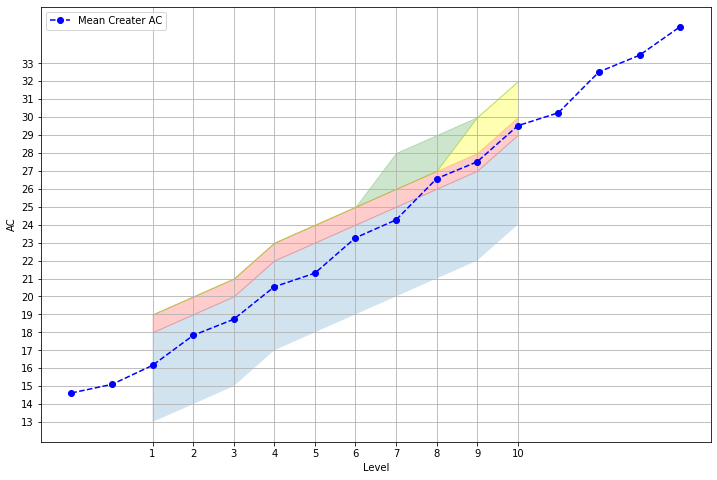

In [7]:
# plt.plot(lvls, min_ac, 'bo-', label = "Min AC")
plt.fill_between(lvls, min_ac, max_mid_ac, alpha = .2)
# plt.plot(lvls, max_mid_ac, 'ro-', label = "Max AC in Mid Armor")
plt.fill_between(lvls, max_mid_ac, max_heavy_ac, alpha = .2, color = "red")
plt.fill_between(lvls, max_heavy_ac, max_fighter_ac, alpha = .3, color = "yellow")
# plt.plot(lvls, max_champ_ac, 'go-.', label = "Champion's Max AC (Heavy)")
plt.fill_between(lvls, max_fighter_ac, max_champ_ac, alpha = .2, color = "green")
# plt.plot(lvls, max_champ_shild_ac, 'g:', linewidth = 3, label = "Champion's Max AC (Heavy+Shield)")
# plt.plot(lvls, max_fighter_ac, 'yo-.' , label = "Fighter's Max AC (Heavy)")
# plt.plot(lvls, max_heavy_ac, 'ro--', label = "Max AC in Heavy Armor")

plt.plot(creature_lvls, creature_mean_ac, 'b--o', label = "Mean Creater AC")

plt.xticks(lvls)
plt.yticks(np.arange(13, 34))
plt.grid(True)
plt.xlabel("Level")
plt.ylabel("AC")

plt.legend()

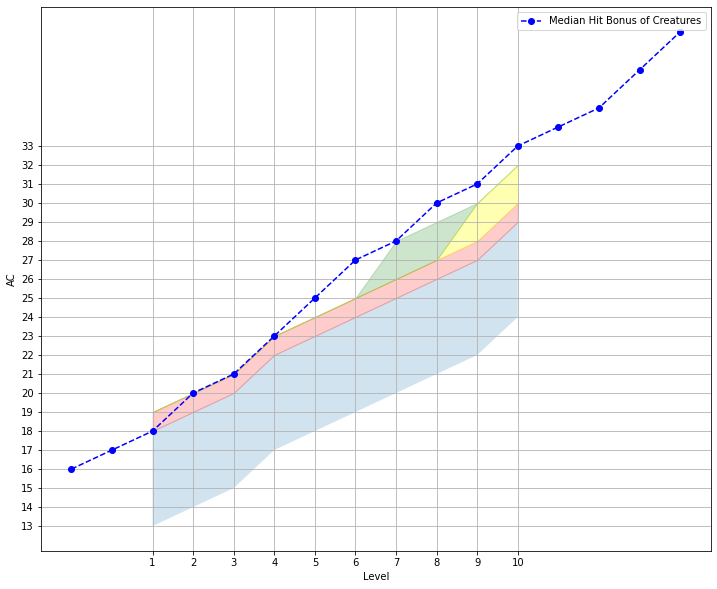

In [8]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# Instantiate a second axes that shares the same x-axis
# ax2 = ax1.twinx()  
# ax2.set_ylim(4, 20);

# plt.plot(lvls, min_ac, 'bo-', label = "Min AC")
ax1.fill_between(lvls, min_ac, max_mid_ac, alpha = .2)
# plt.plot(lvls, max_mid_ac, 'ro-', label = "Max AC in Mid Armor")
ax1.fill_between(lvls, max_mid_ac, max_heavy_ac, alpha = .2, color = "red")
ax1.fill_between(lvls, max_heavy_ac, max_fighter_ac, alpha = .3, color = "yellow")
# plt.plot(lvls, max_champ_ac, 'go-.', label = "Champion's Max AC (Heavy)")
ax1.fill_between(lvls, max_fighter_ac, max_champ_ac, alpha = .2, color = "green")
# plt.plot(lvls, max_champ_shild_ac, 'g:', linewidth = 3, label = "Champion's Max AC (Heavy+Shield)")
# plt.plot(lvls, max_fighter_ac, 'yo-.' , label = "Fighter's Max AC (Heavy)")
# plt.plot(lvls, max_heavy_ac, 'ro--', label = "Max AC in Heavy Armor")

ax1.plot(creature_lvls, creature_median_hit + 10, 'b--o', label = "Median Hit Bonus of Creatures")
# ax1.plot(creature_lvls, creature_mean_hit + 10, 'r--o', label = "Mean Hit Bonus of Creatures")

plt.xticks(lvls)
plt.yticks(np.arange(13, 34))
plt.grid(True)
plt.xlabel("Level")
plt.ylabel("AC")

plt.legend()

In [9]:
s = """
6.20
6.44
7.74
9.66
10.69
12.61
13.14
16.18
17.49
19.23
20.44
21.98
22.52
25.00
26.31
27.96
"""
s.replace("\n", ", ")

', 6.20, 6.44, 7.74, 9.66, 10.69, 12.61, 13.14, 16.18, 17.49, 19.23, 20.44, 21.98, 22.52, 25.00, 26.31, 27.96, '